The attached dataset called “S_n_I_A_N_P_An_Io_noaa2.txt”. The dataset contains 870 rows × 7 columns in a space separated manner. The columns are 'SAM', 'nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD'. Here ISMR is mean monthly rainfall in Indian region. Other columns denote potential causal drivers for ISMR, which are climatic conditions in other parts of the world. The rows contain monthly data for the months 'May', 'June', 'July', 'Aug', 'Sep', 'Oct' for the years 1871-2015 (145x6=870).

The Antarctic Oscillation (AAO) is a ring of variability that encircles the South Pole and extends as far north as New Zealand. The AAO is also referred to as the Southern Annular Mode (SAM).
The Atlantic Multidecadal Oscillation (AMO) includes a series of long-duration changes in the sea-surface temperature in the North Atlantic Ocean.
The NAO is a periodic change in atmospheric pressure between Iceland and Portugal that affects the strength of prevailing winds—the westerlies—over the North Atlantic Ocean, producing the strongest influence on weather patterns over the Northeast U.S. of any of the oscillations. 
The Pacific Decadal Oscillation (PDO) is a long-term fluctuation that occurs in the Pacific Ocean every 20 to 30 years that is characterized by variable sea-surface temperatures in the north-central Pacific and near the Gulf of Alaska.
The Indian Ocean Dipole (IOD) is characterized by an irregular oscillation of sea-surface temperatures in the eastern and western Indian Ocean.

In [32]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import xgboost as xgb
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set(font_scale=2)
sns.set_theme(style="darkgrid",palette='flare_r')


In [33]:
indices = pd.date_range(start='1871-05-01',end='2015-10-01',freq='MS')
indices = [i for i in indices if i.month in [5,6,7,8,9,10]]

indices

[Timestamp('1871-05-01 00:00:00', freq='MS'),
 Timestamp('1871-06-01 00:00:00', freq='MS'),
 Timestamp('1871-07-01 00:00:00', freq='MS'),
 Timestamp('1871-08-01 00:00:00', freq='MS'),
 Timestamp('1871-09-01 00:00:00', freq='MS'),
 Timestamp('1871-10-01 00:00:00', freq='MS'),
 Timestamp('1872-05-01 00:00:00', freq='MS'),
 Timestamp('1872-06-01 00:00:00', freq='MS'),
 Timestamp('1872-07-01 00:00:00', freq='MS'),
 Timestamp('1872-08-01 00:00:00', freq='MS'),
 Timestamp('1872-09-01 00:00:00', freq='MS'),
 Timestamp('1872-10-01 00:00:00', freq='MS'),
 Timestamp('1873-05-01 00:00:00', freq='MS'),
 Timestamp('1873-06-01 00:00:00', freq='MS'),
 Timestamp('1873-07-01 00:00:00', freq='MS'),
 Timestamp('1873-08-01 00:00:00', freq='MS'),
 Timestamp('1873-09-01 00:00:00', freq='MS'),
 Timestamp('1873-10-01 00:00:00', freq='MS'),
 Timestamp('1874-05-01 00:00:00', freq='MS'),
 Timestamp('1874-06-01 00:00:00', freq='MS'),
 Timestamp('1874-07-01 00:00:00', freq='MS'),
 Timestamp('1874-08-01 00:00:00', 

In [34]:
data = pd.read_csv("S_n_I_A_N_P_An_Io_noaa2.txt",delimiter=' ',skipinitialspace=True, names = ['SAM', 'nino', 'ISMR', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD'],index_col = False,engine='python')
data

,SAM,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
0,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
2,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
3,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
4,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...,...
865,1.147740,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
866,1.579510,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
867,0.923487,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373
868,0.207229,2.259830,-43.77540,0.492069,-0.579453,-1.432400,0.008520,0.771095


In [35]:
data['date'] = indices
data.head(10)

,SAM,nino,ISMR,AMO,NAO,PDO,At-nino,IOD,date
0,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856,1871-05-01
1,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952,1871-06-01
2,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708,1871-07-01
3,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477,1871-08-01
4,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719,1871-09-01
5,-1.315320,0.304163,-41.57720,-0.131097,0.426335,-1.318260,0.539299,0.504654,1871-10-01
6,-0.218169,-0.459120,-9.54688,0.245049,0.761093,1.384890,0.339908,0.160190,1872-05-01
7,0.087474,-0.514044,25.37050,0.319834,0.359620,-1.646100,0.416788,-0.086156,1872-06-01
8,-0.509434,0.725602,18.27740,0.238155,-0.366861,1.179110,0.659362,-0.019451,1872-07-01
9,0.212935,-0.587951,2.22167,0.484559,-0.378269,1.932310,0.815623,-0.090139,1872-08-01


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SAM      870 non-null    float64       
 1   nino     870 non-null    float64       
 2   ISMR     870 non-null    float64       
 3   AMO      870 non-null    float64       
 4   NAO      870 non-null    float64       
 5   PDO      870 non-null    float64       
 6   At-nino  870 non-null    float64       
 7   IOD      870 non-null    float64       
 8   date     870 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8)
memory usage: 61.3 KB


In [37]:
data.set_index('date',inplace=True)

In [38]:
data

,SAM,nino,ISMR,AMO,NAO,PDO,At-nino,IOD
date,,,,,,,,
1871-05-01,0.599257,0.167651,10.24380,0.484010,0.000837,1.084100,0.560382,-0.295856
1871-06-01,0.663879,0.212788,44.16110,0.603261,-0.317969,-1.465790,1.189540,-0.032952
1871-07-01,-0.428772,0.336627,4.76807,0.609364,0.423296,0.114019,0.783738,-0.644708
1871-08-01,0.513283,0.575112,-63.58770,0.219494,0.352545,1.807430,0.560395,-0.295477
1871-09-01,-0.260801,0.647786,12.57720,0.040233,-0.528239,-0.108867,0.727379,0.044719
...,...,...,...,...,...,...,...,...
2015-06-01,1.147740,1.296340,23.70850,0.161498,-0.385948,0.108982,-0.079691,0.297551
2015-07-01,1.579510,1.572200,-41.18450,0.174294,-0.945931,2.158290,-0.189664,0.441171
2015-08-01,0.923487,2.007070,-56.14030,0.277507,0.413170,0.031796,-0.188361,0.534373


<AxesSubplot:xlabel='date'>

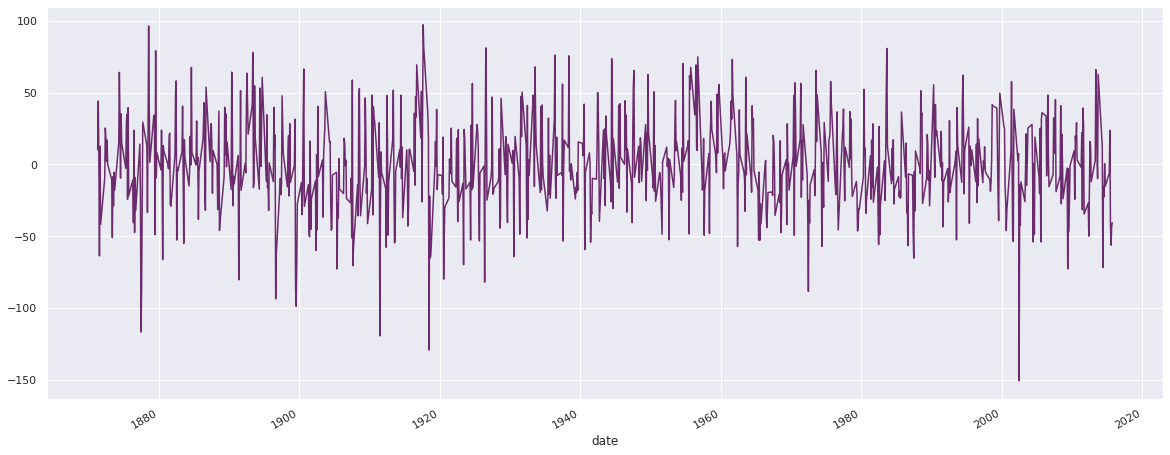

In [39]:
data['ISMR'].plot(kind='line',figsize=(20,8))

In [40]:
data.ISMR.rolling(3).sum()#.plot(kind="line",figsize=(20,8))

date
1871-05-01          NaN
1871-06-01          NaN
1871-07-01     59.17297
1871-08-01    -14.65853
1871-09-01    -46.24243
                ...    
2015-06-01      2.26043
2015-07-01    -23.68487
2015-08-01    -73.61630
2015-09-01   -141.10020
2015-10-01   -140.34550
Name: ISMR, Length: 870, dtype: float64

In [41]:
rainfall_vals = data['ISMR']
rainfall_quaterly = rainfall_vals.resample('Q').sum()
rainfall_quaterly#.plot(kind='line',figsize=(20,8))

date
1871-06-30     54.40490
1871-09-30    -46.24243
1871-12-31    -41.57720
1872-03-31      0.00000
1872-06-30     15.82362
                ...    
2014-12-31    -15.23920
2015-03-31      0.00000
2015-06-30     17.49963
2015-09-30   -141.10020
2015-12-31    -40.42980
Freq: Q-DEC, Name: ISMR, Length: 579, dtype: float64

In [42]:
features = [ 'nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD']
target = 'ISMR'

In [43]:
df = data[[ 'nino', 'AMO', 'NAO', 'PDO', 'At-nino', 'IOD','ISMR']].copy(deep=True)
df

,nino,AMO,NAO,PDO,At-nino,IOD,ISMR
date,,,,,,,
1871-05-01,0.167651,0.484010,0.000837,1.084100,0.560382,-0.295856,10.24380
1871-06-01,0.212788,0.603261,-0.317969,-1.465790,1.189540,-0.032952,44.16110
1871-07-01,0.336627,0.609364,0.423296,0.114019,0.783738,-0.644708,4.76807
1871-08-01,0.575112,0.219494,0.352545,1.807430,0.560395,-0.295477,-63.58770
1871-09-01,0.647786,0.040233,-0.528239,-0.108867,0.727379,0.044719,12.57720
...,...,...,...,...,...,...,...
2015-06-01,1.296340,0.161498,-0.385948,0.108982,-0.079691,0.297551,23.70850
2015-07-01,1.572200,0.174294,-0.945931,2.158290,-0.189664,0.441171,-41.18450
2015-08-01,2.007070,0.277507,0.413170,0.031796,-0.188361,0.534373,-56.14030


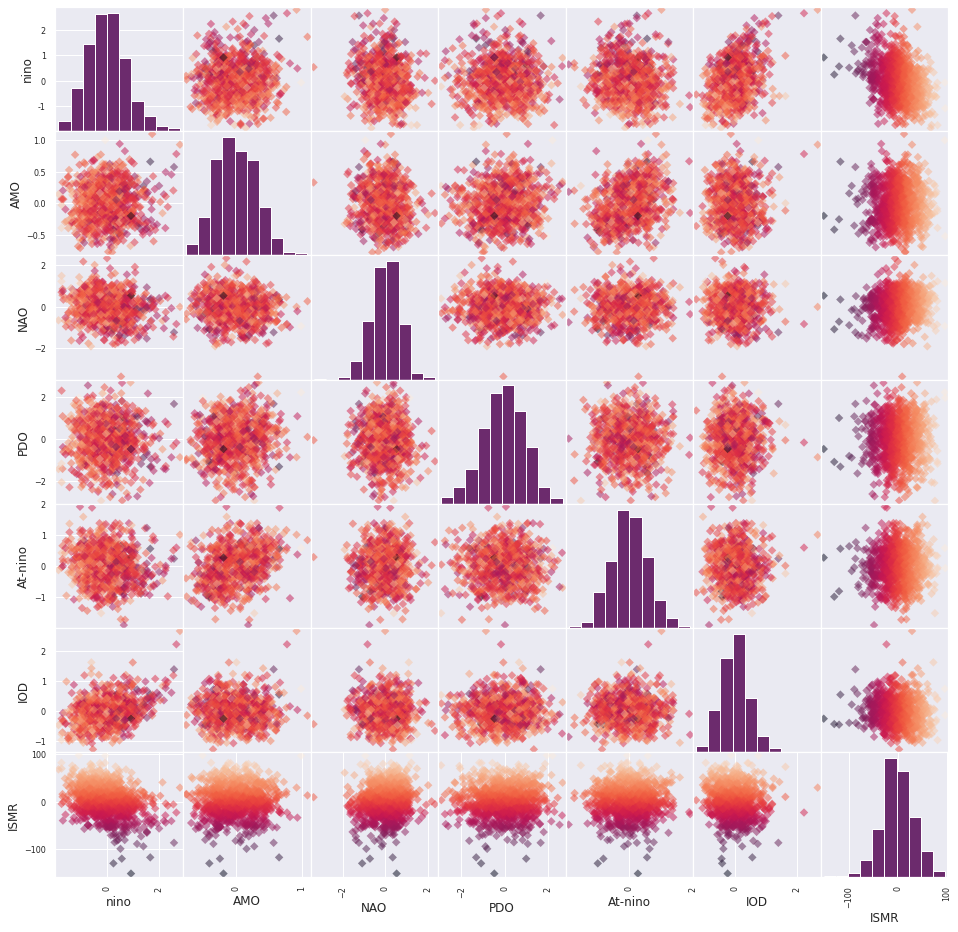

In [44]:
_ = pd.plotting.scatter_matrix(df,marker='D',figsize = (16,16),c = df.ISMR)

<AxesSubplot:>

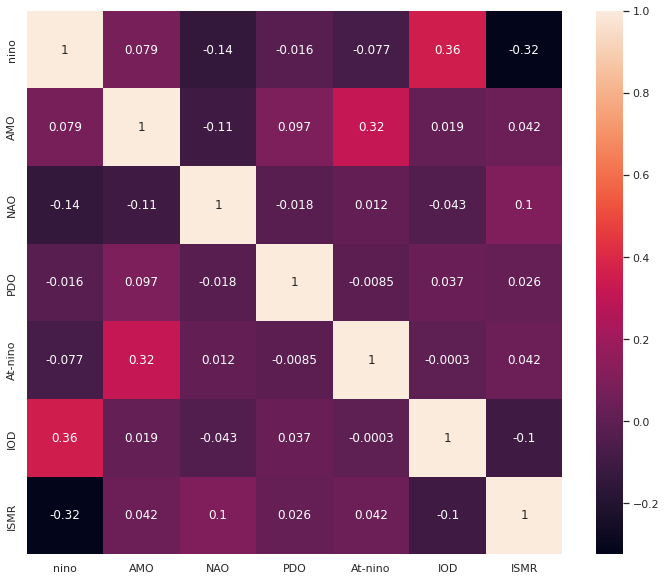

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df.corr(),annot=True)

In [46]:
# scaler = StandardScaler()
# df.loc[:'2010',features] = scaler.fit_transform(df.loc[:'2010',features])
# df.loc['2011':,features] = scaler.transform(df.loc['2011':,features])

In [47]:
df['prev_ISMR'] = df[target].shift(periods=1)
features.append('prev_ISMR')
df.fillna(method='bfill',inplace=True)
df

,nino,AMO,NAO,PDO,At-nino,IOD,ISMR,prev_ISMR
date,,,,,,,,
1871-05-01,0.167651,0.484010,0.000837,1.084100,0.560382,-0.295856,10.24380,10.24380
1871-06-01,0.212788,0.603261,-0.317969,-1.465790,1.189540,-0.032952,44.16110,10.24380
1871-07-01,0.336627,0.609364,0.423296,0.114019,0.783738,-0.644708,4.76807,44.16110
1871-08-01,0.575112,0.219494,0.352545,1.807430,0.560395,-0.295477,-63.58770,4.76807
1871-09-01,0.647786,0.040233,-0.528239,-0.108867,0.727379,0.044719,12.57720,-63.58770
...,...,...,...,...,...,...,...,...
2015-06-01,1.296340,0.161498,-0.385948,0.108982,-0.079691,0.297551,23.70850,-6.20887
2015-07-01,1.572200,0.174294,-0.945931,2.158290,-0.189664,0.441171,-41.18450,23.70850
2015-08-01,2.007070,0.277507,0.413170,0.031796,-0.188361,0.534373,-56.14030,-41.18450


In [48]:
for i in range(7):
    df['target_lag'+str(i)] = df[target].shift(periods=-i)
df

,nino,AMO,NAO,PDO,At-nino,IOD,ISMR,prev_ISMR,target_lag0,target_lag1,target_lag2,target_lag3,target_lag4,target_lag5,target_lag6
date,,,,,,,,,,,,,,,
1871-05-01,0.167651,0.484010,0.000837,1.084100,0.560382,-0.295856,10.24380,10.24380,10.24380,44.16110,4.76807,-63.58770,12.57720,-41.57720,-9.54688
1871-06-01,0.212788,0.603261,-0.317969,-1.465790,1.189540,-0.032952,44.16110,10.24380,44.16110,4.76807,-63.58770,12.57720,-41.57720,-9.54688,25.37050
1871-07-01,0.336627,0.609364,0.423296,0.114019,0.783738,-0.644708,4.76807,44.16110,4.76807,-63.58770,12.57720,-41.57720,-9.54688,25.37050,18.27740
1871-08-01,0.575112,0.219494,0.352545,1.807430,0.560395,-0.295477,-63.58770,4.76807,-63.58770,12.57720,-41.57720,-9.54688,25.37050,18.27740,2.22167
1871-09-01,0.647786,0.040233,-0.528239,-0.108867,0.727379,0.044719,12.57720,-63.58770,12.57720,-41.57720,-9.54688,25.37050,18.27740,2.22167,16.88660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-01,1.296340,0.161498,-0.385948,0.108982,-0.079691,0.297551,23.70850,-6.20887,23.70850,-41.18450,-56.14030,-43.77540,-40.42980,NaN,NaN
2015-07-01,1.572200,0.174294,-0.945931,2.158290,-0.189664,0.441171,-41.18450,23.70850,-41.18450,-56.14030,-43.77540,-40.42980,NaN,NaN,NaN
2015-08-01,2.007070,0.277507,0.413170,0.031796,-0.188361,0.534373,-56.14030,-41.18450,-56.14030,-43.77540,-40.42980,NaN,NaN,NaN,NaN


RMSE =  33.66766230653008


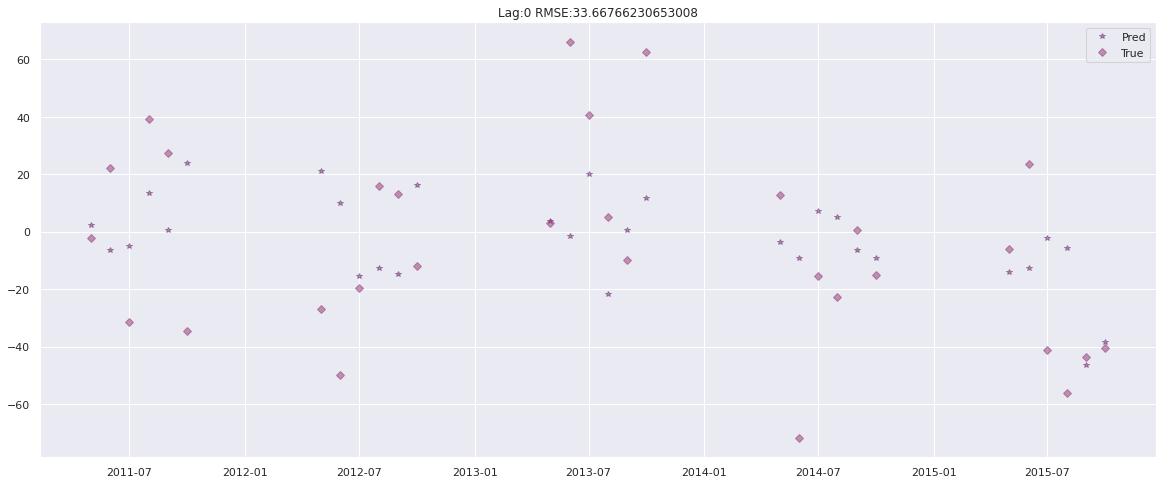

In [49]:

X_train=df.loc[:'2010'][features]
X_test =df.loc['2011':][features]
y_train=df.loc[:'2010']['target_lag'+str(0)]
y_test =df.loc['2011':]['target_lag'+str(0)]


model = xgb.XGBRegressor(random_state=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RMSE = ',mse(y_test,y_pred)**0.5)
y_pred = pd.Series(y_pred,index=y_test.index)

plt.figure(figsize=(20,8))
plt.title('Lag:{} RMSE:{}'.format(0,mse(y_test,y_pred)**0.5))
plt.plot(y_pred.index,y_pred,'*',label="Pred",alpha=0.5)
plt.plot(y_test.index,y_test,'D',label="True",alpha=0.5)
plt.legend()
plt.show()


Text(0.5, 0, 'Relative Importance')

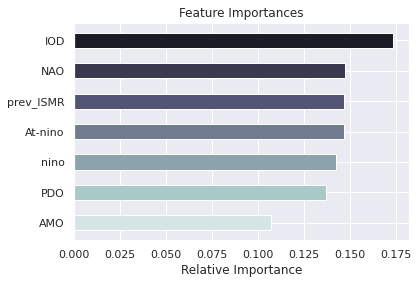

In [50]:
feat = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
palette_0 = sns.color_palette('bone',n_colors=len(indices))
palette_0.reverse()
plt.barh(range(len(indices)), importances[indices],height=0.5,color=palette_0)
plt.yticks(range(len(indices)), feat[indices])
plt.xlabel('Relative Importance')

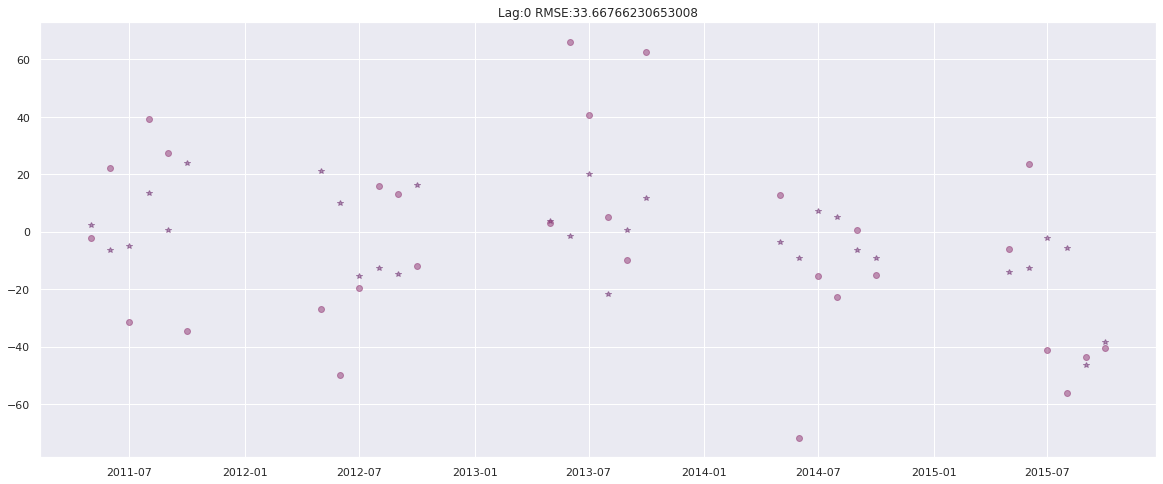

--------------------------------------------------------------------


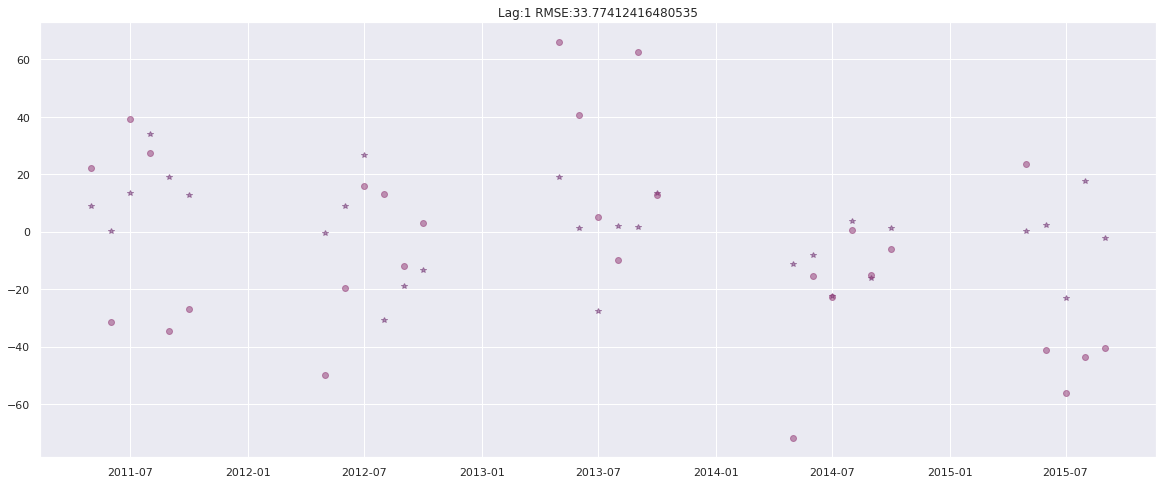

--------------------------------------------------------------------


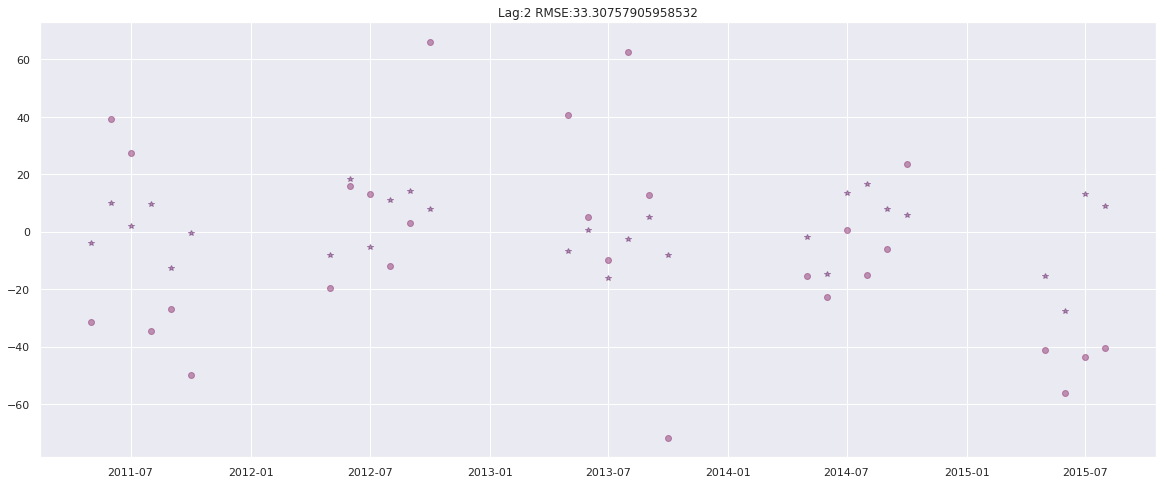

--------------------------------------------------------------------


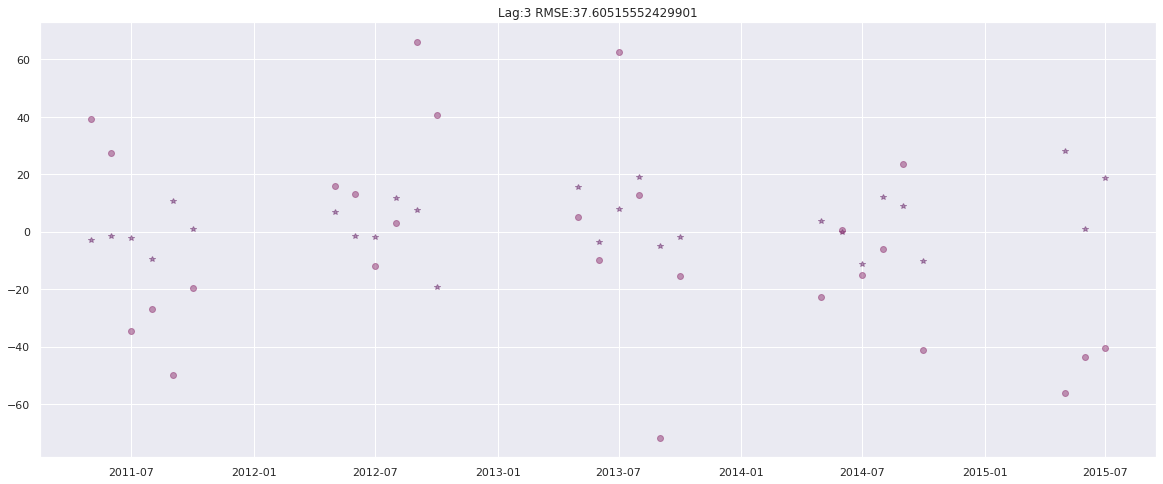

--------------------------------------------------------------------


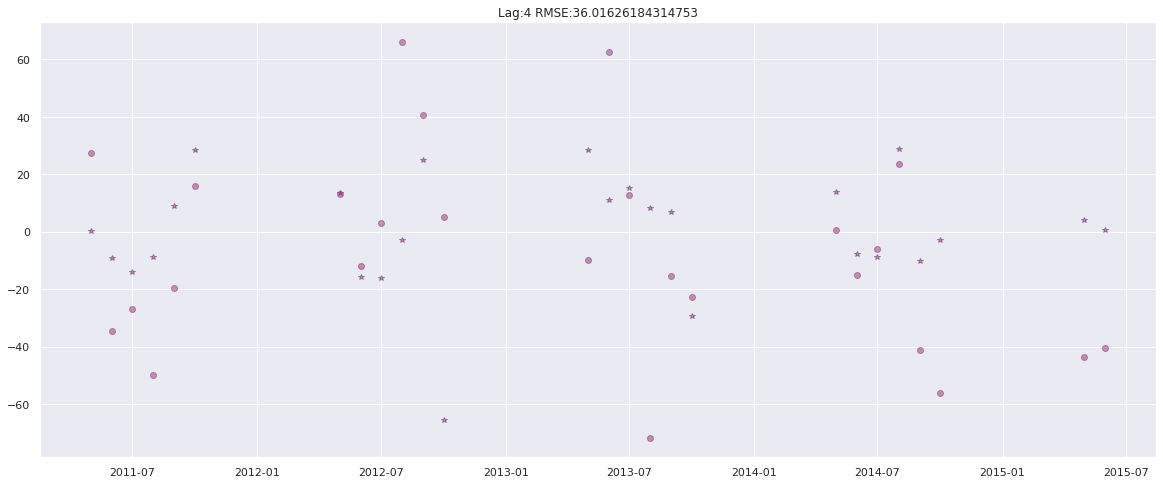

--------------------------------------------------------------------


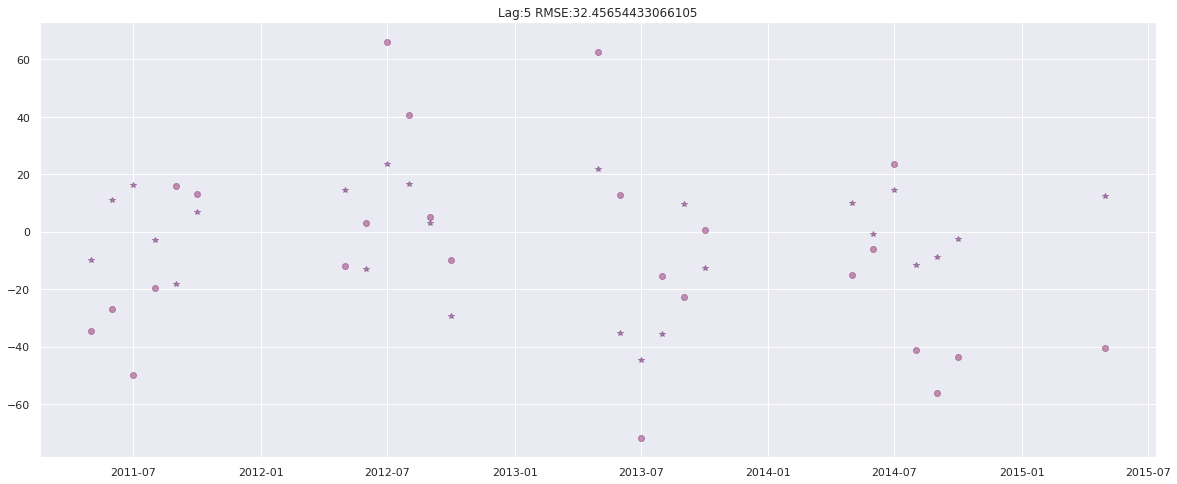

--------------------------------------------------------------------


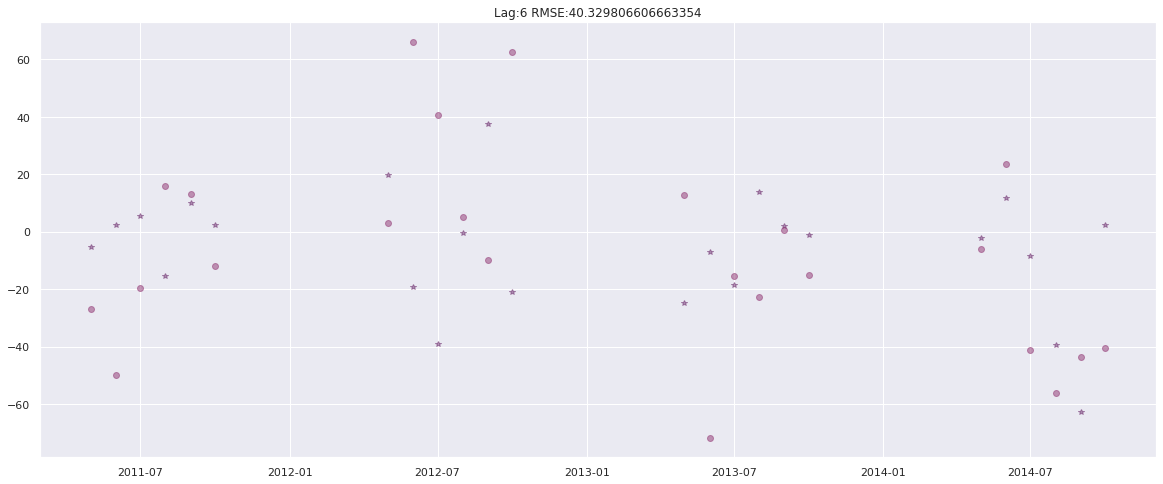

--------------------------------------------------------------------


In [51]:

for i in range(7):
    df_lagged = df[features+['target_lag'+str(i)]].copy()
    df_lagged.dropna(inplace=True)
    X_train=df_lagged.loc[:'2010'][features]
    X_test =df_lagged.loc['2011':][features]
    y_train=df_lagged.loc[:'2010']['target_lag'+str(i)]
    y_test =df_lagged.loc['2011':]['target_lag'+str(i)]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    y_pred = pd.Series(y_pred,index=y_test.index)

    plt.figure(figsize=(20,8))
    plt.title('Lag:{} RMSE:{}'.format(i,mse(y_test,y_pred)**0.5))
    plt.plot(y_pred.index,y_pred,'*',label="Pred",alpha=0.5)
    plt.plot(y_test.index,y_test,'o',label="True",alpha=0.5)
    plt.show()
    print('--------------------------------------------------------------------')
    # break

SVM regression

In [52]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV

In [54]:
model = SVR()
params = {
    'kernel': ['rbf','linear','poly'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':['scale','auto'],
    'degree':[3,4,5],
    }

gs = GridSearchCV(model,params,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
for i in range(7):
    df_lagged = df[features+['target_lag'+str(i)]].copy()
    df_lagged.dropna(inplace=True)
    X_train=df_lagged.loc[:'2010'][features]
    X_test =df_lagged.loc['2011':][features]
    y_train=df_lagged.loc[:'2010']['target_lag'+str(i)]
    y_test =df_lagged.loc['2011':]['target_lag'+str(i)]
    gs.fit(X_train,y_train)
    print('For lag {}'.format(i))
    print("Tuned SVM Regression Parameters: {}".format(gs.best_params_))
    print("Best score is {}".format((-gs.best_score_)**0.5))

    # break
    # y_pred = model.predict(X_test)

    # y_pred = pd.Series(y_pred,index=y_test.index)

    # plt.figure(figsize=(20,8))
    # plt.title('Lag:{} RMSE:{}'.format(i,mse(y_test,y_pred)**0.5))
    # plt.plot(y_pred.index,y_pred,'*',label="Pred",alpha=0.5)
    # plt.plot(y_test.index,y_test,'o',label="True",alpha=0.5)
    # plt.show()
    # print('-'*50)
    # # break

KeyboardInterrupt: 

RMSE =  32.39012859219988


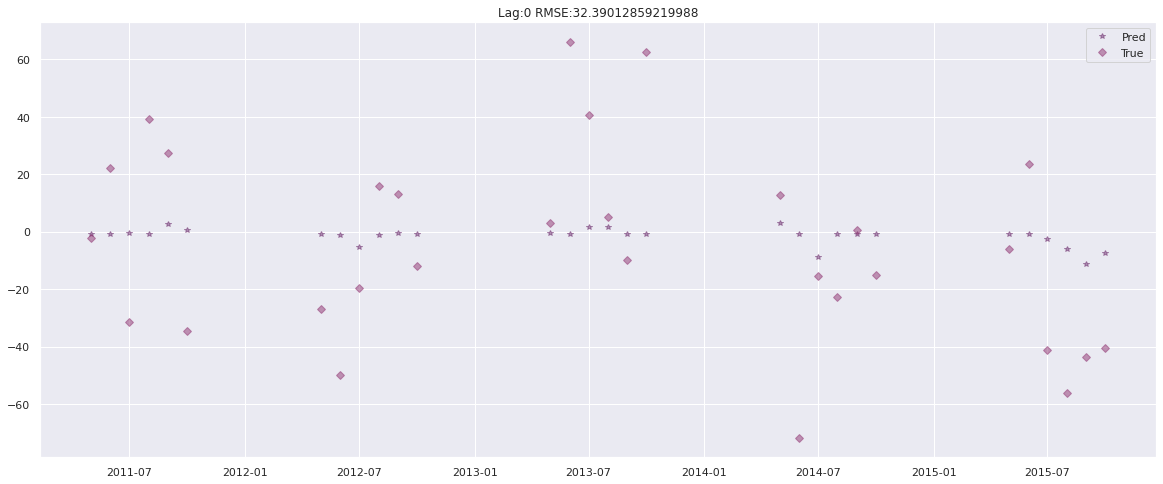

In [53]:
i=0
df_lagged = df[features+['target_lag'+str(i)]].copy()
df_lagged.dropna(inplace=True)
X_train=df_lagged.loc[:'2010'][features]
X_test =df_lagged.loc['2011':][features]
y_train=df_lagged.loc[:'2010']['target_lag'+str(i)]
y_test =df_lagged.loc['2011':]['target_lag'+str(i)]

model = SVR(kernel='poly',degree=3,C=10,gamma='scale')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('RMSE = ',mse(y_test,y_pred)**0.5)
y_pred = pd.Series(y_pred,index=y_test.index)

plt.figure(figsize=(20,8))
plt.title('Lag:{} RMSE:{}'.format(0,mse(y_test,y_pred)**0.5))
plt.plot(y_pred.index,y_pred,'*',label="Pred",alpha=0.5)
plt.plot(y_test.index,y_test,'D',label="True",alpha=0.5)
plt.legend()
plt.show()